# 5. Model Evaluation

Description

In [1]:
# Importing libraries

import os
from pathlib import Path
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as pt
from scipy.stats import ttest_ind

In [2]:
# Changing the directory to the project folder

os.chdir(Path(os.path.realpath("")).resolve().parents[2])

In [3]:
# Importing modules that fetch data

from src.getter.load_application_and_opportunity import get_processed_data

# Gathering the data
similarity_w2v = get_processed_data("similarity_dict_w2v")
similarity_bert = get_processed_data("similarity_dict_bert")
similarity_dbert = get_processed_data("similarity_dict_dbert")

In [4]:
sdata = pd.concat([similarity_w2v, similarity_bert, similarity_dbert], axis=1)

cosine_sim_data_hstack = sdata[
    [
        "cosine_similarity__w2v_hstack",
        "cosine_similarity__bert_hstack",
        "cosine_similarity__dbert_hstack",
    ]
]
cosine_sim_data_vstack = sdata[
    [
        "cosine_similarity__w2v_vstack",
        "cosine_similarity__bert_vstack",
        "cosine_similarity__dbert_vstack",
    ]
]

In [5]:
# Getting mean values of the cosine similarities
for col_name in cosine_sim_data_hstack.columns:
    print(
        "=" * 10 + "Horizontally Stacked - Cosine Similarity" + "=" * 10 + "\n",
        f"{col_name} mean : ",
        np.round(cosine_sim_data_hstack[col_name].mean(), 4),
        f"{col_name} SD : ",
        np.round(cosine_sim_data_hstack[col_name].std(), 4),
        f"{col_name} variance : ",
        np.round(cosine_sim_data_hstack[col_name].var(), 4),
        "\n",
    )

for col_name in cosine_sim_data_vstack.columns:
    print(
        "=" * 10 + "Vertically Stacked - Cosine Similarity" + "=" * 10 + "\n",
        f"{col_name} mean : ",
        np.round(cosine_sim_data_vstack[col_name].mean(), 4),
        f"{col_name} SD : ",
        np.round(cosine_sim_data_vstack[col_name].std(), 4),
        f"{col_name} variance : ",
        np.round(cosine_sim_data_vstack[col_name].var(), 4),
        "\n",
    )

==========Horizontally Stacked - Cosine Similarity==========
 cosine_similarity__w2v_hstack mean :  -0.0013 cosine_similarity__w2v_hstack SD :  0.0195 cosine_similarity__w2v_hstack variance :  0.0004 

==========Horizontally Stacked - Cosine Similarity==========
 cosine_similarity__bert_hstack mean :  -0.0012 cosine_similarity__bert_hstack SD :  0.014 cosine_similarity__bert_hstack variance :  0.0002 

==========Horizontally Stacked - Cosine Similarity==========
 cosine_similarity__dbert_hstack mean :  -0.0014 cosine_similarity__dbert_hstack SD :  0.0126 cosine_similarity__dbert_hstack variance :  0.0002 

==========Vertically Stacked - Cosine Similarity==========
 cosine_similarity__w2v_vstack mean :  0.3337 cosine_similarity__w2v_vstack SD :  0.076 cosine_similarity__w2v_vstack variance :  0.0058 

==========Vertically Stacked - Cosine Similarity==========
 cosine_similarity__bert_vstack mean :  0.8344 cosine_similarity__bert_vstack SD :  0.0364 cosine_similarity__bert_vstack varianc

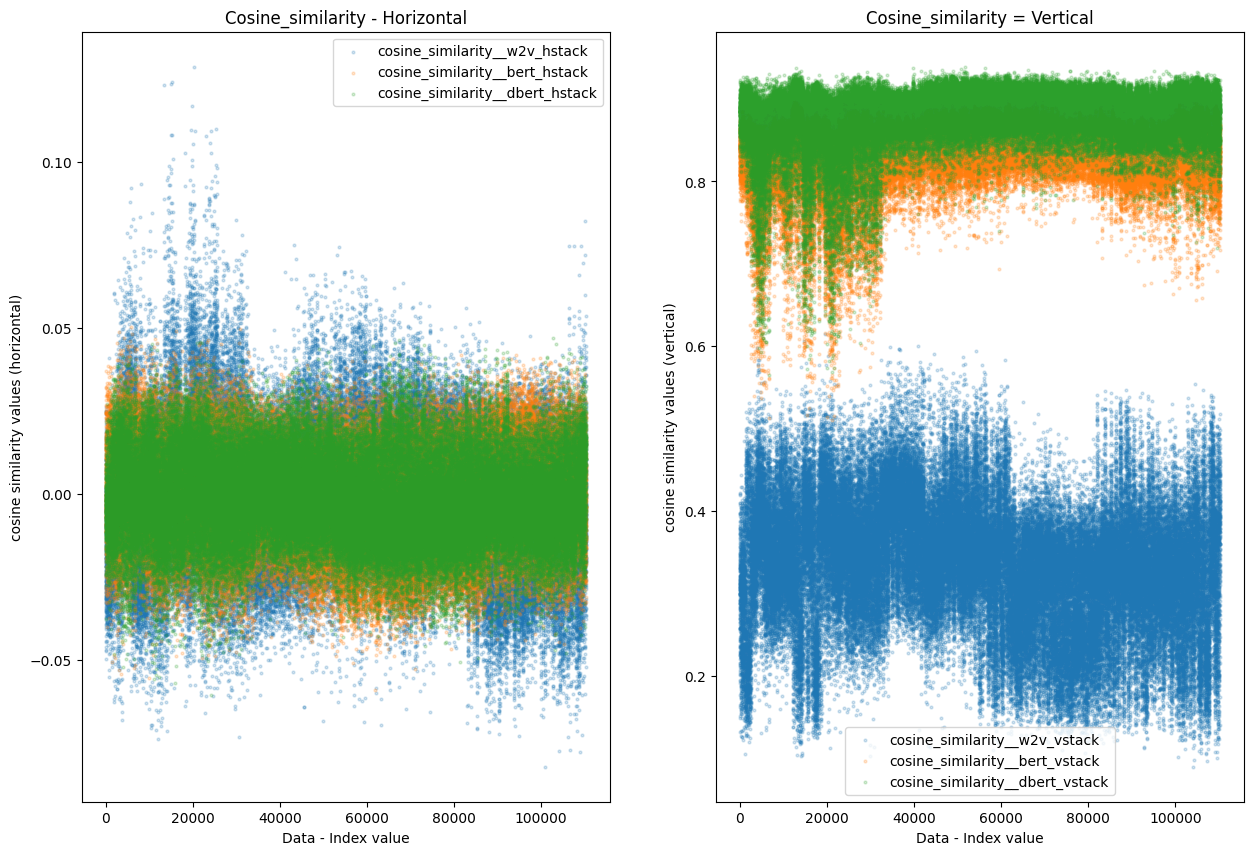

In [11]:
# Plotting horizontal cosine_similarities - scatter plot

fig, axis = pt.subplots(nrows=1, ncols=2, figsize=(15, 10))

for col_name in cosine_sim_data_hstack.columns:
    axis[0].scatter(
        range(len(cosine_sim_data_hstack)),
        cosine_sim_data_hstack[col_name],
        label=col_name,
        alpha=0.2,
        s=4,
    )

axis[0].set_title("Cosine_similarity - Horizontal")
axis[0].set_xlabel("Data - Index value")
axis[0].set_ylabel("cosine similarity values (horizontal)")
axis[0].legend()

for col_name in cosine_sim_data_vstack.columns:
    axis[1].scatter(
        range(len(cosine_sim_data_vstack)),
        cosine_sim_data_vstack[col_name],
        label=col_name,
        alpha=0.2,
        s=4,
    )

axis[1].set_title("Cosine_similarity = Vertical")
axis[1].set_xlabel("Data - Index value")
axis[1].set_ylabel("cosine similarity values (vertical)")
axis[1].legend()
pt.show()

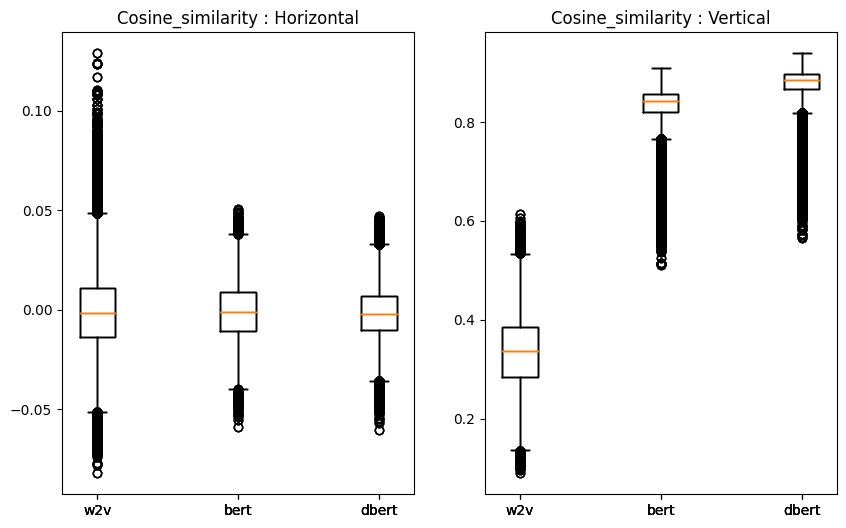

In [12]:
# Plotting horizontal cosine_similarities - box plot

fig, axis = pt.subplots(nrows=1, ncols=2, figsize=(10, 6))

for col_name in cosine_sim_data_hstack.columns:
    axis[0].boxplot(
        cosine_sim_data_hstack, positions=[1, 3, 5], labels=["w2v", "bert", "dbert"]
    )

axis[0].set_title("Cosine_similarity : Horizontal stacked")


for col_name in cosine_sim_data_vstack.columns:
    axis[1].boxplot(
        cosine_sim_data_vstack, positions=[1, 3, 5], labels=["w2v", "bert", "dbert"]
    )

axis[1].set_title("Cosine_similarity : Vertical stacked")

pt.show()

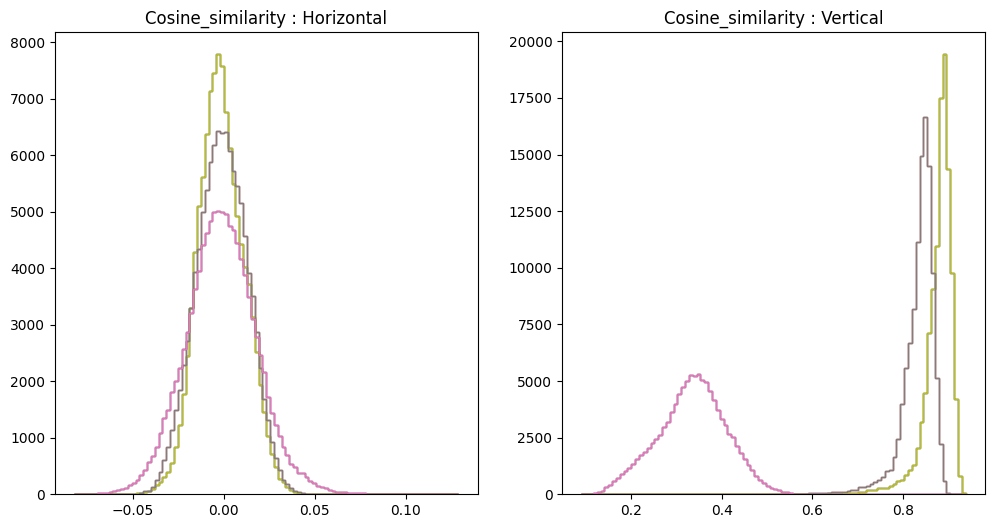

In [16]:
# Plotting horizontal cosine_similarities - histogram

fig, axis = pt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for col_name in cosine_sim_data_hstack.columns:
    axis[0].hist(cosine_sim_data_hstack, bins=100, histtype="step")

axis[0].set_title("Cosine_similarity : Horizontal")


for col_name in cosine_sim_data_vstack.columns:
    axis[1].hist(cosine_sim_data_vstack, bins=100, histtype="step")

axis[1].set_title("Cosine_similarity : Vertical")

pt.show()

In [ ]:
# Conducting t-test to check the closeness of the means

ttest_w2v_bert = ttest_ind(
    cosine_sim_data.cosine_similarity__w2v,
    cosine_sim_data.cosine_similarity__bert,
)

print(f"t-test statistic w2v v/s bert = {ttest_w2v_bert}")

ttest_w2v_dbert = ttest_ind(
    cosine_sim_data.cosine_similarity__w2v, 
    cosine_sim_data.cosine_similarity__dbert
)
print(f"t-test statistic w2v v/s dbert = {ttest_w2v_dbert}")

ttest_bert_dbert = ttest_ind(
    cosine_sim_data.cosine_similarity__bert, 
    cosine_sim_data.cosine_similarity__dbert
)
print(f"t-test statistic bert v/s dbert = {ttest_bert_dbert}")

t-test statistic w2v v/s bert = TtestResult(statistic=17.656967410918618, pvalue=1.0048190630678494e-69, df=220532.0)
t-test statistic w2v v/s dbert = TtestResult(statistic=20.288091568091076, pvalue=1.9865993193966893e-91, df=220532.0)
t-test statistic bert v/s dbert = TtestResult(statistic=3.3901286793214935, pvalue=0.0006987205968353406, df=220532.0)


A very low p-values in all of the cases suggest that there is no coherence with amongst the vectors generated. this is possibly due to the horizontally stacking of the vectors and using PCA to reduce the dimensionality. 